In [6]:
import os
import re
def extract(file_path):
    
    n_qubits=0
    cpu_mem =0
    gpu_mem = 0
    time=0
    
    
    
    # Open the file and read its contents
    with open(file_path, 'r') as file:
        content = file.read()

    # Extract other information
    qubits_pattern = re.compile(r'number of qubits =\s+(\d+)', re.IGNORECASE)
    qubits_match = re.search(qubits_pattern, content)
    if qubits_match:
        num_qubits = int(qubits_match.group(1))
        n_qubits = num_qubits
        # print("Number of qubits:", num_qubits)

    layers_pattern = re.compile(r'number of layers =\s+(\d+)', re.IGNORECASE)
    layers_match = re.search(layers_pattern, content)
    if layers_match:
        num_layers = int(layers_match.group(1))
        # print("Number of layers:", num_layers)


    time_pattern = re.compile(r'time consumed: ([0-9.]+)s', re.IGNORECASE)
    time_match = re.search(time_pattern, content)
    if time_match:
        time_consumed = float(time_match.group(1))
        # time = float(time_consumed)
        time=round(time_consumed, 2)
        # print("Time consumed:", time_consumed, "s")

    cpu_memory_pattern = re.compile(r'CPU Memory usage : \((\d+), (\d+)\)', re.IGNORECASE)
    cpu_memory_match = re.search(cpu_memory_pattern, content)
    if cpu_memory_match:
        cpu_memory_usage = (int(cpu_memory_match.group(1)), int(cpu_memory_match.group(2)))
        # print(cpu_memory_usage[1]/1000000)
        # print("CPU Memory usage:", cpu_memory_usage)
        # cpu_mem=float(cpu_memory_usage[1]/(2**20))
        cpu_mem=round(cpu_memory_usage[1] / (2 ** 20), 2)
        # cpu_mem=float(cpu_memory_usage[1]/(10**6))

    gpu_memory_pattern = re.compile(r'GPU memory usage: (\d+) MiB', re.IGNORECASE)
    gpu_memory_match = re.search(gpu_memory_pattern, content)
    if gpu_memory_match:
        gpu_memory_usage = int(gpu_memory_match.group(1))
        gpu_mem = gpu_memory_usage
        # print("GPU Memory usage:", gpu_memory_usage, "MiB")
    
    return n_qubits,time,cpu_mem,gpu_mem,cpu_mem+gpu_mem


In [7]:
data = {}

y_runtime_pennylane = []
y_memory_pennylane_cpu = []

device = 'tensorflow'

# Specify the folder path
folder_path = '../tensor/'+device

# List all files in the folder
files = os.listdir(folder_path)

# Run the extract function on each file
for file in files:
    file_path = os.path.join(folder_path, file)
    # print(file_path)
    info=extract(file_path)
    if(info[1]!=0):
        # print(info)
        data[info[0]]=[info[1],info[2]]
        
print(data)
import pandas as pd
sorted_data = dict(sorted(data.items()))
df = pd.DataFrame.from_dict(sorted_data, orient='index', columns=['Runtime(Seconds)', 'Memory(MiB)'])
df.index.name = 'Key'

filename = 'TesnsorCircuit.'+device+'.xlsx'
df.to_excel(filename)
print(f"Data saved to {filename}")

{16: [5.31, 6.25], 5: [23.48, 4.42], 10: [40.29, 4.59], 20: [22.52, 40.41], 12: [2.62, 4.72], 8: [23.55, 4.5], 22: [22.68, 163.21], 21: [22.6, 81.19], 11: [4.57, 4.65], 18: [6.85, 10.81], 19: [22.25, 20.14], 4: [23.48, 4.38], 9: [23.76, 4.55], 26: [22.49, 2670.07], 13: [3.09, 4.84], 25: [12.38, 1327.44], 15: [4.58, 5.46], 6: [23.48, 4.44], 14: [7.94, 5.07], 24: [8.35, 660.0], 17: [4.93, 7.77], 23: [6.42, 328.18], 7: [23.48, 4.48]}
Data saved to TesnsorCircuit.tensorflow.xlsx


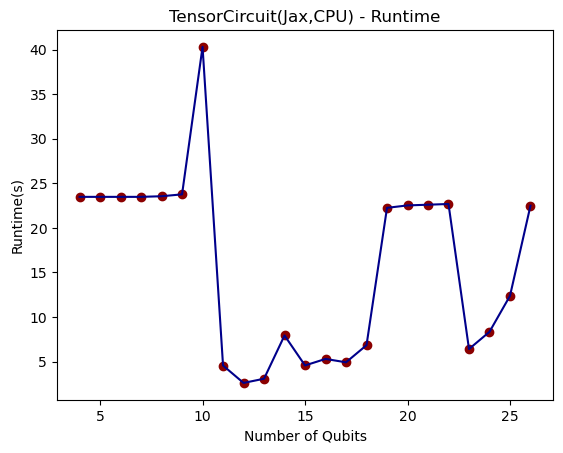

In [8]:
import matplotlib.pyplot as plt


# Extract x and y values from dict1
x1 = list(data.keys())
x1.sort()
y1 = [data[x][0] for x in x1]

# Plot the data points
# plt.plot(x1, y1, label='Pennylane(default.qubit)',color='darkblue')
plt.plot(x1, y1,color='darkblue')

# Add data points for dict1
plt.scatter(x1, y1, color='darkred')


# Add labels and title
plt.xlabel('Number of Qubits')
plt.ylabel('Runtime(s)')
# plt.ylabel('Memory(MiB)')
# plt.title('TensorCircuit(Tensorflow,GPU) - Runtime')
# plt.title('TensorCircuit(Jax,CPU) - Memory')
plt.title('TensorCircuit(Jax,CPU) - Runtime')

# Show the plot
plt.show()
